In [2]:
from random import uniform, randint
from typing import List, Dict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev
from scipy.stats import norm

In [3]:
SAMPLES = 5000

In [4]:
base = [[randint(1, 100) for _ in range(SAMPLES)], [20 for _ in range(SAMPLES)]]
res = []
zeros = 0
ones = 0
for i in base[0]:
    if i + 20 < 70:
        res.append(0)
        zeros += 1
    else:
        res.append(1)
        ones += 1
print(zeros)
print(ones)

2462
2538


In [5]:
noise = [randint(1,100) for _ in range(SAMPLES)]

In [8]:
data = {}
data["a"] = base[0]
data["b"] = base[1]
data["noise"] = noise
data["result"] = res


In [9]:
df = pd.DataFrame(data)
df.head(5)

,a,b,noise,result
0,98,20,88,1
1,89,20,43,1
2,27,20,2,0
3,79,20,74,1
4,18,20,77,0


In [10]:
all_features = df.drop("result",axis=1)
Targeted_feature = df["result"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3500, 3), (1500, 3), (3500,), (1500,))

In [11]:
FIRST_LAYER = 10
model = Sequential()
model.add(Dense(FIRST_LAYER, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-11-03 10:08:14.470514: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-03 10:08:14.470672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
def create_history(columns: int, nodes: int) -> Dict:
    return {i:{j: [] for j in range(nodes)} for i in range(columns)}

In [13]:
history = create_history(len(X_train.columns), FIRST_LAYER)
history

{0: {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []},
 1: {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []},
 2: {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}}

In [14]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(
      x=X_train, 
      y=y_train, 
      epochs=1,
      batch_size=100,
    )
    all_weights = model.layers[0].get_weights()[0].tolist()
    for column in range(len(all_weights)):
        for node in range(len(all_weights[column])):
            history[column][node].append(all_weights[column][node])

RUNNING EPOCH 1


2022-11-03 10:08:24.774474: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-03 10:08:24.976008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 5ms/step - loss: 7.2164 - accuracy: 0.5877
RUNNING EPOCH 2
35/35 [==============================] - 0s 5ms/step - loss: 3.6082 - accuracy: 0.6020
RUNNING EPOCH 3
35/35 [==============================] - 0s 5ms/step - loss: 1.5742 - accuracy: 0.6220
RUNNING EPOCH 4
35/35 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 0.8031
RUNNING EPOCH 5
35/35 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.9429
RUNNING EPOCH 6
35/35 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.9789
RUNNING EPOCH 7
35/35 [==============================] - 0s 5ms/step - loss: 0.0646 - accuracy: 0.9871
RUNNING EPOCH 8
35/35 [==============================] - 0s 5ms/step - loss: 0.0591 - accuracy: 0.9900
RUNNING EPOCH 9
35/35 [==============================] - 0s 5ms/step - loss: 0.0563 - accuracy: 0.9880
RUNNING EPOCH 10
35/35 [==============================] - 0s 5ms/step - loss: 0.0527 - ac

In [15]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

In [16]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1, 1 + FIRST_LAYER)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,1 + FIRST_LAYER)]
    )

In [17]:
def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i])
    return group

In [18]:
a = get_groups(0, FIRST_LAYER)
b = get_groups(1, FIRST_LAYER)
noises = get_groups(2, FIRST_LAYER)

In [19]:
all_fields = [a, b, noises]
colors = [important, darker, noise]

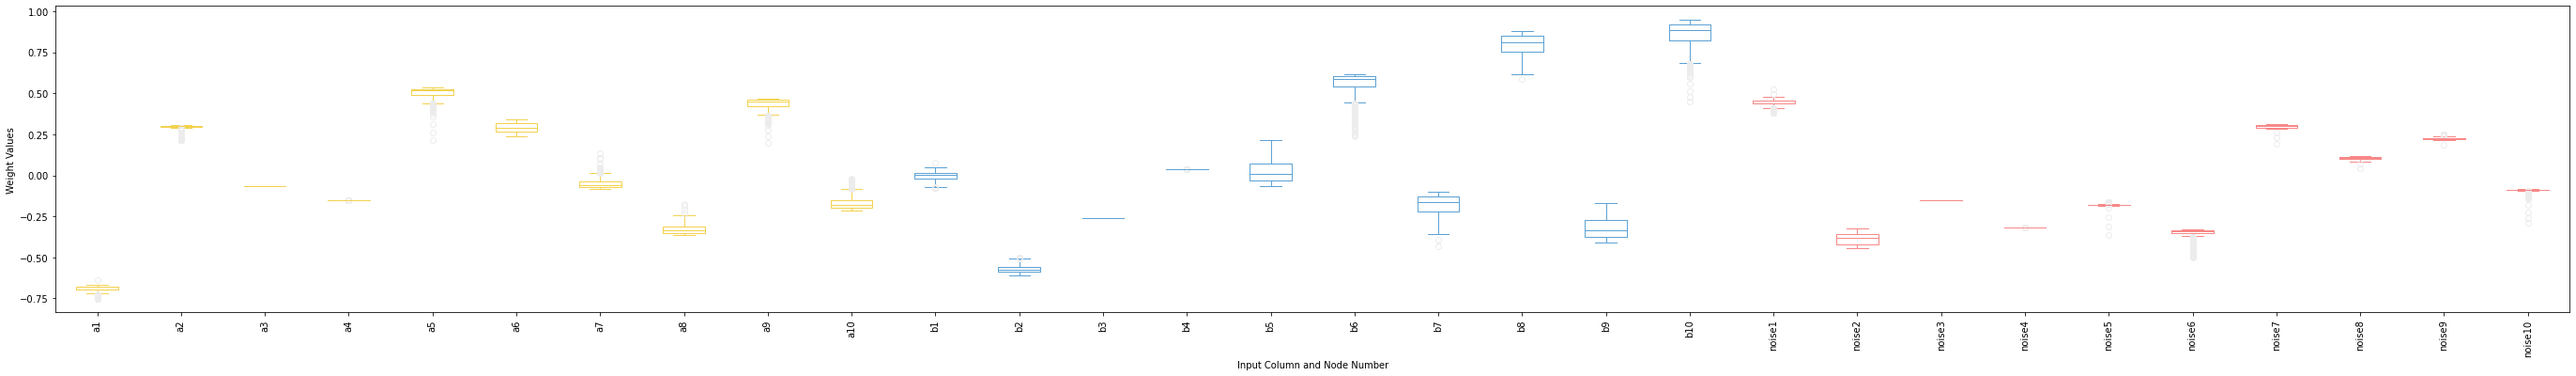

In [20]:
fig, ax = plt.subplots(figsize=(48,6))
column_names = list(df.columns[:-1])

for i, field in enumerate(all_fields):
    generate_box_plot(ax, field, colors[i], column_names[i], i * FIRST_LAYER, showfliers=True)
for label in ax.get_xticklabels():
    label.set_rotation(90)

In [21]:
def get_group_by_node(index: int) -> List:
    group = []
    for i in list(history.keys()):
        group.append(history[i][index])
    return group

In [22]:
def plot_pdfs(group, colors):
    fig, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

In [23]:
groups = [get_group_by_node(i) for i in range(FIRST_LAYER)]

[[-0.6401699781417847,
  -0.6650043725967407,
  -0.6767527461051941,
  -0.6789209246635437,
  -0.6778459548950195,
  -0.6774863600730896,
  -0.6771119832992554,
  -0.6770190000534058,
  -0.6769445538520813,
  -0.6769021153450012,
  -0.6768338680267334,
  -0.676920473575592,
  -0.6768727898597717,
  -0.6769135594367981,
  -0.6768379807472229,
  -0.6768712997436523,
  -0.6769084334373474,
  -0.6768833994865417,
  -0.6771253347396851,
  -0.6771143674850464,
  -0.6770619750022888,
  -0.6772565245628357,
  -0.6772334575653076,
  -0.6773368716239929,
  -0.677318811416626,
  -0.6773990392684937,
  -0.6774636507034302,
  -0.6774844527244568,
  -0.6775190234184265,
  -0.6774057745933533,
  -0.6778449416160583,
  -0.67777419090271,
  -0.6779820919036865,
  -0.6780050992965698,
  -0.6779393553733826,
  -0.6779685616493225,
  -0.6780957579612732,
  -0.6779146790504456,
  -0.6779506206512451,
  -0.6780140399932861,
  -0.6780285835266113,
  -0.6781278252601624,
  -0.6779907941818237,
  -0.6780493855

/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


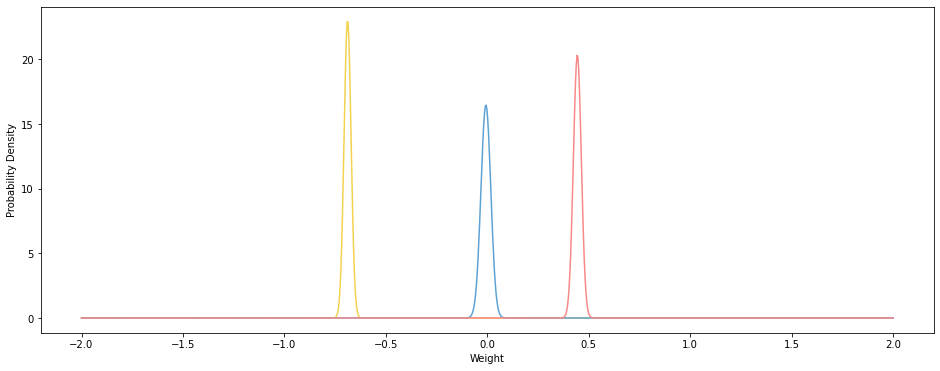

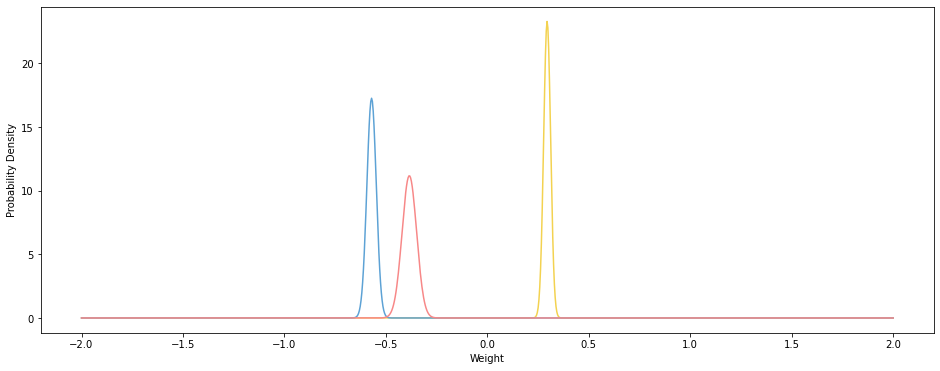

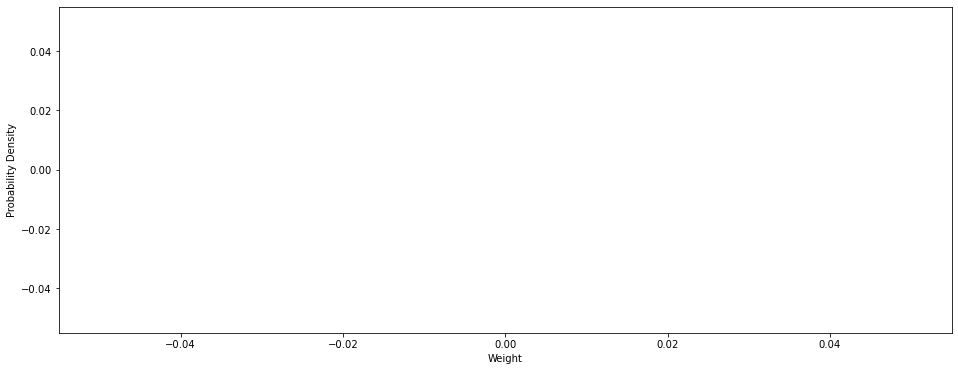

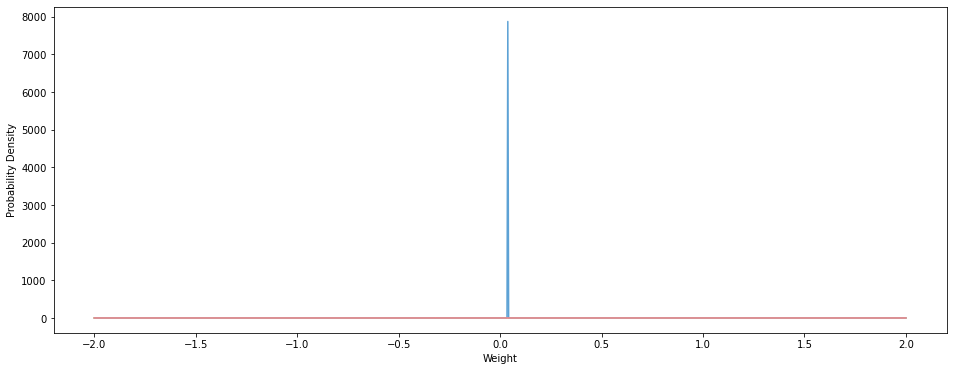

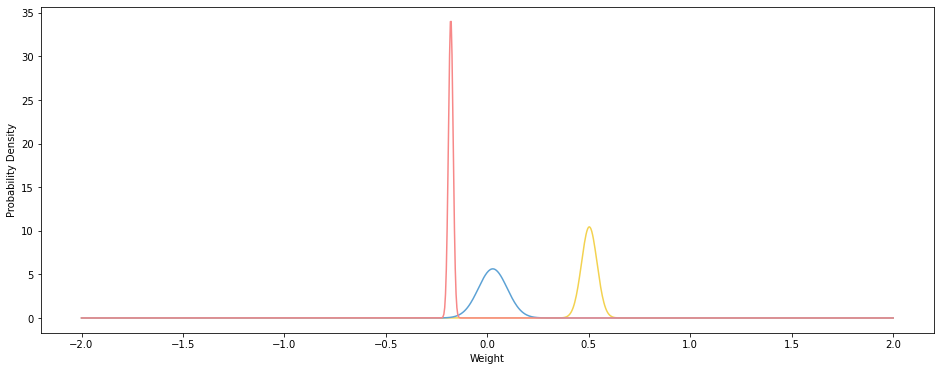

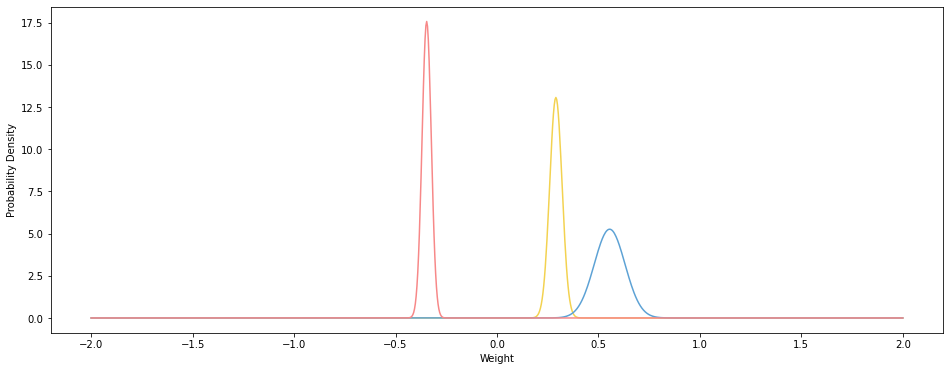

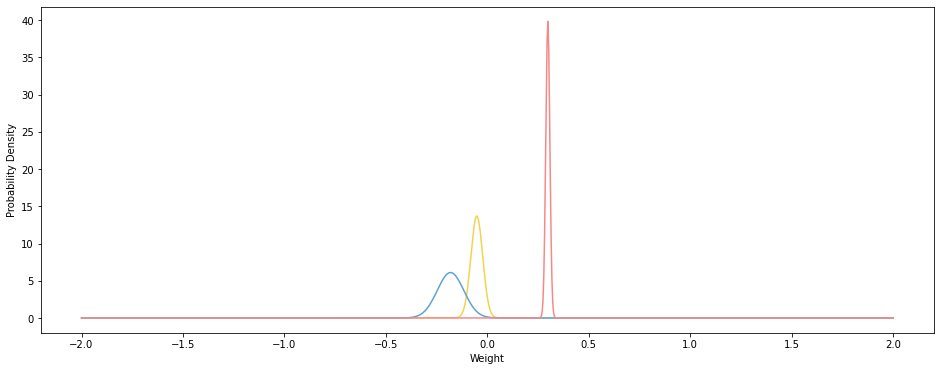

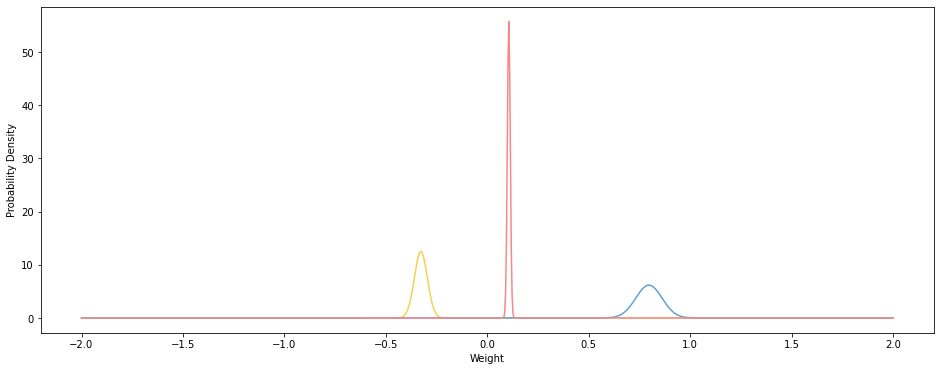

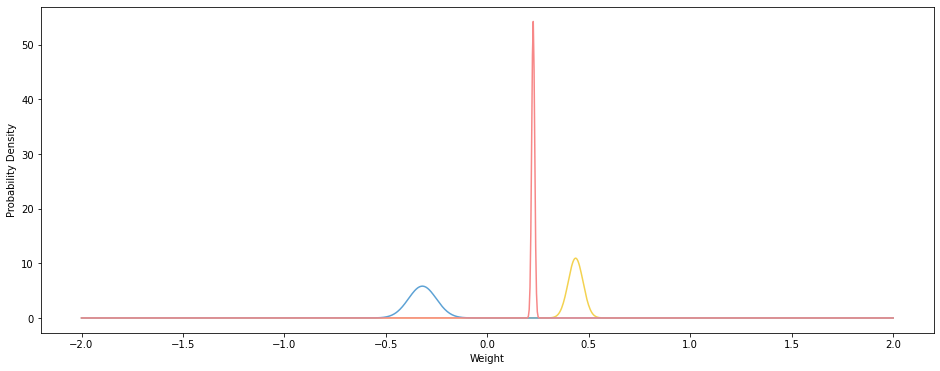

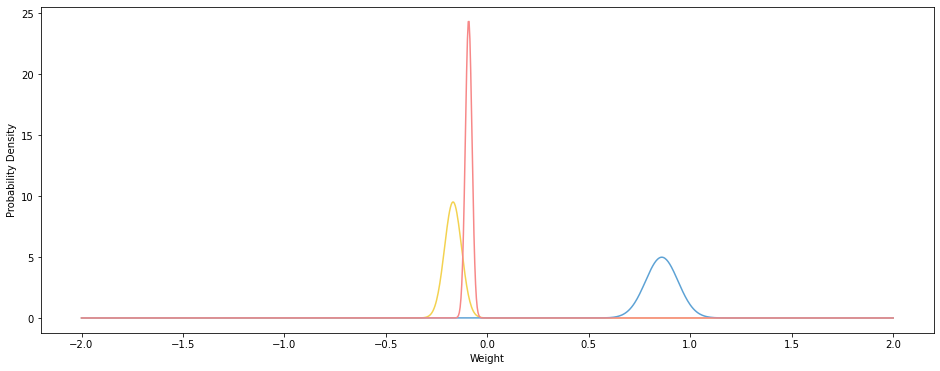

In [24]:
for group in groups:
    plot_pdfs(group, colors)

In [25]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            try:
                if math.floor(prob) != 0:
                    values.append(abs(prob))
            except ValueError:
                pass
        results.append(values)
    return results

In [26]:
columns = list(df.columns)[:-1]

In [28]:
all_probs = [get_props(group) for group in groups]

/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [31]:
def barrage(all_probs, columns: int):
    res = {i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(columns)}
    for probs in all_probs:
        for i, prob in enumerate(probs):
            if len(prob) > 1:
                res[i]["len"] += len(prob)
                res[i]["max"] += max(prob)
                res[i]["sum"] += sum(prob)
                res[i]["mean"] += mean(prob)
                res[i]["stdev"] += stdev(prob)
    return res

In [32]:
length = len(list(df.columns)[:-1])
res = barrage(all_probs, length)
for i in range(length):
    res[columns[i]] = res.pop(i)
res

{'a': {'len': 273,
  'max': 116.37852216018487,
  'sum': 1951.997453488293,
  'mean': 61.35994442288542,
  'stdev': 37.836434936368455},
 'b': {'len': 451,
  'max': 67.67889314781637,
  'sum': 1895.134683595249,
  'mean': 38.94899091096367,
  'stdev': 20.374286605193756},
 'noise': {'len': 161,
  'max': 257.20424094529324,
  'sum': 1974.9532352797746,
  'mean': 119.80212744912761,
  'stdev': 90.61031718776856}}

In [33]:
df = pd.DataFrame(res)
df

,a,b,noise
len,273.000000,451.000000,161.000000
max,116.378522,67.678893,257.204241
sum,1951.997453,1895.134684,1974.953235
mean,61.359944,38.948991,119.802127
stdev,37.836435,20.374287,90.610317


''

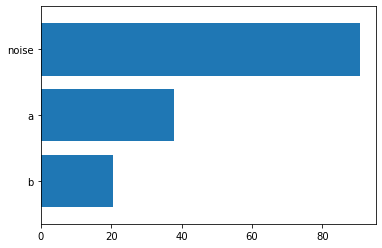

In [39]:
pd.Series(df.loc["stdev"],df.columns).sort_values(ascending=True).plot.barh(width=0.8)
;